In [19]:
import requests
import json
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

### some useful staffs

In [20]:
url_base = 'http://165.227.157.145:8080'

In [73]:
# this function allow us to download and save data in some range
def download_data(x_list,name='mlkiwi.csv'):
    y = []
    index = 0
    for x in x_list:
        url = url_base + '/api/do_measurement?x='+ str(x)
        r = requests.get(url)
        response = json.loads(r.text)
        y.append(response['data']['y'])
    return np.array(y,dtype=np.float)

### first we have to download some data. just heuristic. from -10 to 10 with step 0.5.

In [47]:
x = np.arange(-10,10,0.5)
y = download_data(xs)

### lets try to visualize

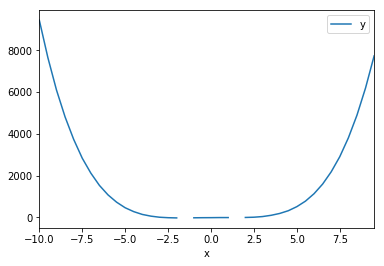

In [48]:
plt.plot(x, y)

### looks like parabola, but we see some fluctuations or singularities  on the vertex. probably it is kind of polynome. lets try to scale it

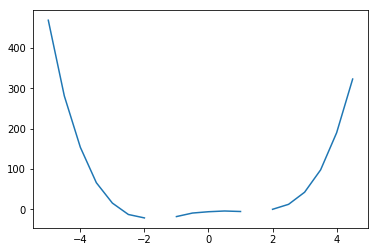

In [121]:
x = np.arange(-5,5,0.5)
y = download_data(x)
plt.plot(x, y)

### so here we can see that the function have some singularities, so probably this function just a piecewise

#### lets see the one part

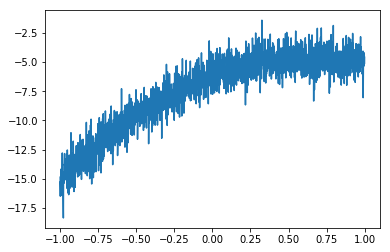

In [102]:
x = np.arange(-1,1,0.001)
y = download_data(x)
plt.plot(x, y)

### oh shhh... ok go throught this

In [117]:
z = np.polyfit(x, y, 4)
p = np.poly1d(z)

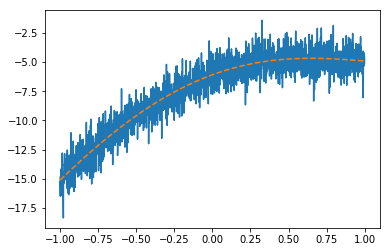

In [118]:
plt.plot(x, y, '-', x, p(x), '--')

### it is looks like we have some second-order(or third-order) polynomial function diluted with some random noise